<a href="https://colab.research.google.com/github/MichaelDavisBaskaran/Movie-Recommendation-Engine/blob/main/MovieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# fetch ratings data
!wget https://www.dropbox.com/s/zpjqx685em4hllf/ratings.csv



In [2]:
#use pandas to get access and read data from file
import pandas as pd

ratingDetail = pd.read_csv('ratings.csv')

ratingDetail.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# fetch movies data

!wget https://www.dropbox.com/s/9vk3xh99pt5f27l/movies.csv

In [4]:
import pandas as pd

movieDetail = pd.read_csv('movies.csv')

movieDetail.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#shape

ratingDetail.shape

(100836, 4)

In [7]:
movieDetail.shape

(9742, 3)

In [11]:
ratingDetail.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
movieDetail.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [14]:
data = pd.merge(ratingDetail,movieDetail, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [17]:
#change timestamp into proper time using datetime function

import datetime
from datetime import datetime, date

data['datetime'] = pd.to_datetime(data['timestamp'])

In [30]:
#Average ranking

temp = data
temp= temp.groupby('title')['rating'].mean()
#temp


In [31]:
sortData = temp.sort_values(ascending=False)



In [ ]:
#sortData

In [28]:
temp2 = data.groupby('title')['rating'].count()
#temp2.head() 

title
'71 (2014)                                 1
'Hellboy': The Seeds of Creation (2004)    1
'Round Midnight (1986)                     2
'Salem's Lot (2004)                        1
'Til There Was You (1997)                  2
Name: rating, dtype: int64

In [34]:
newRecord = pd.DataFrame() #call new dataframe

newRecord['Average_Rating'] = temp # create new column with temp data which is average

newRecord['Total_Rating_Count'] = temp2 #create new column with temp2 data which is a count

#newRecord

In [39]:
#Use matlab functionality to visualize

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline


In [40]:
newRecord.columns

Index(['Average_Rating', 'Total_Rating_Count'], dtype='object')

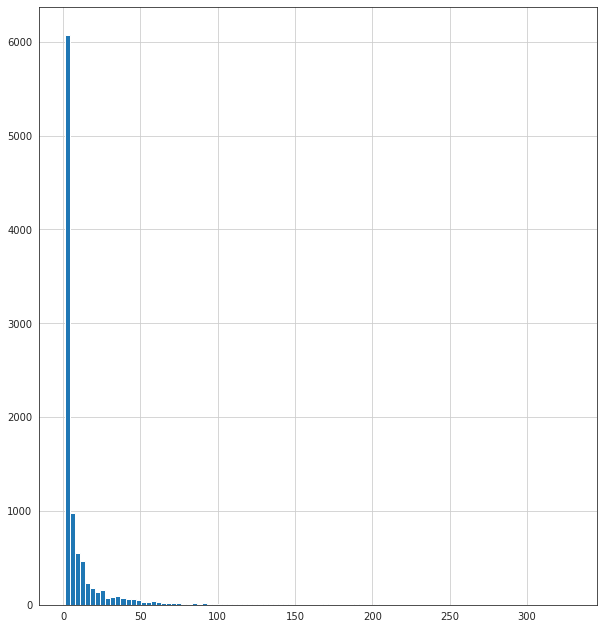

In [44]:
plt.figure(figsize=(10,11))

newRecord['Total_Rating_Count'].hist(bins = 100)

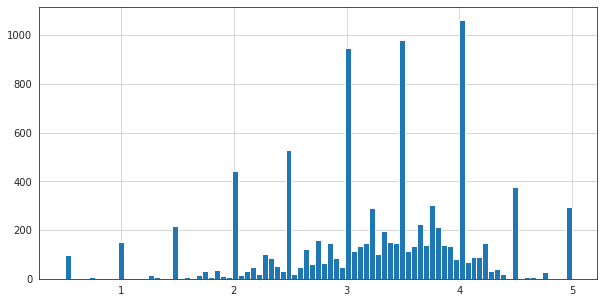

In [45]:
plt.figure(figsize=(10,5))

newRecord['Average_Rating'].hist(bins = 85)

<Figure size 720x432 with 0 Axes>

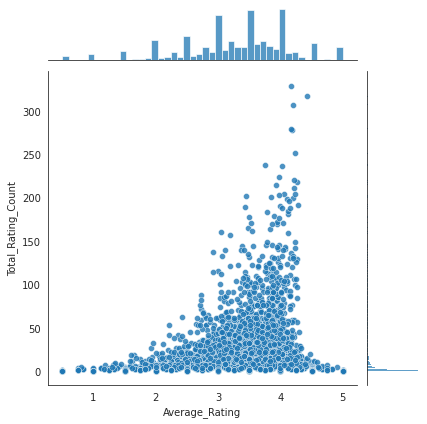

In [48]:
plt.figure(figsize=(10,6))

sns.jointplot(x='Average_Rating', y='Total_Rating_Count', data=newRecord, alpha=0.8)

#shows that movies with lower ratings are only geting very few ratings by users whereas movies with high ratings are getting rated by many users.

In [67]:
movie = data.pivot_table(index='userId',columns='title',values = 'rating')
movie.head()
movie.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [68]:
movie['xXx: State of the Union (2005)']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    NaN
607    NaN
608    NaN
609    NaN
610    1.5
Name: xXx: State of the Union (2005), Length: 610, dtype: float64

In [71]:
state_of_union= movie['xXx: State of the Union (2005)']
state_of_union.tail()

userId
606    NaN
607    NaN
608    NaN
609    NaN
610    1.5
Name: xXx: State of the Union (2005), dtype: float64

In [72]:
similar = movie.corrwith(state_of_union)
similar # similar movies to state_of_union based on ratings

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                       NaN
'Hellboy': The Seeds of Creation (2004)          NaN
'Round Midnight (1986)                           NaN
'Salem's Lot (2004)                              NaN
'Til There Was You (1997)                        NaN
                                              ...   
eXistenZ (1999)                                  NaN
xXx (2002)                                   0.94388
xXx: State of the Union (2005)               1.00000
¡Three Amigos! (1986)                            NaN
À nous la liberté (Freedom for Us) (1931)        NaN
Length: 9719, dtype: float64

<function matplotlib.pyplot.show>

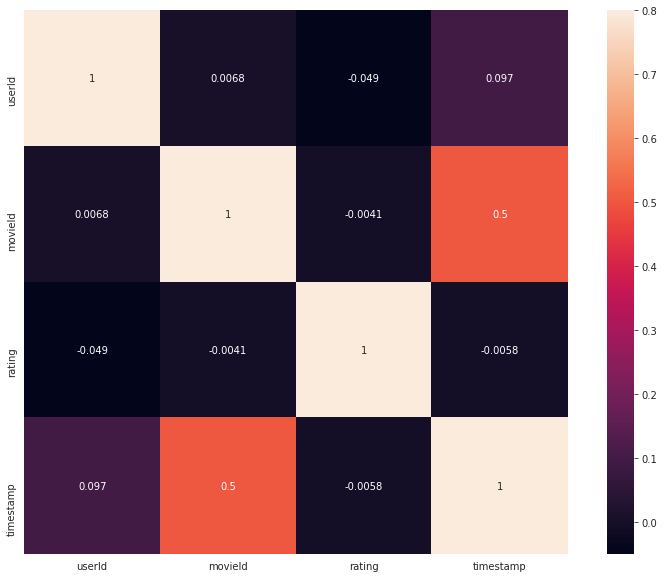

In [73]:
import matplotlib.pyplot as plt

correlation = data.corr()

fig = plt.figure(figsize=(14,10))

#heatmap using seaborn

sns.heatmap(correlation,annot=True,vmax=.8,square=True)
plt.show

In [76]:
state_of_union_corr = pd.DataFrame(similar,columns=['Correlation'])

state_of_union_corr.dropna(inplace =True)
state_of_union_corr.tail()

,Correlation
title,
Zombieland (2009),0.866025
Zoolander (2001),0.000000
[REC] (2007),-0.755929
xXx (2002),0.943880
xXx: State of the Union (2005),1.000000
